In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv(r'C:\Users\M RAJESH\Downloads\Customer_chun.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.drop('customerID',axis=1,inplace = True)

In [5]:
df.shape

(7043, 20)

In [6]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [8]:
df.TotalCharges.unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [9]:
pd.to_numeric(df.TotalCharges, errors='coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [10]:
df[pd.to_numeric(df.TotalCharges, errors='coerce').isnull()] 

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


Remove rows with space in TotalCharges

In [11]:
df1 = df[df.TotalCharges != ' '] 

In [12]:
df1.shape   

(7032, 20)

In [13]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)   

C:\Users\M RAJESH\AppData\Local\Temp\ipykernel_2864\973151263.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.TotalCharges = pd.to_numeric(df1.TotalCharges)


In [14]:
df1.TotalCharges.unique() 

array([  29.85, 1889.5 ,  108.15, ...,  346.45,  306.6 , 6844.5 ])

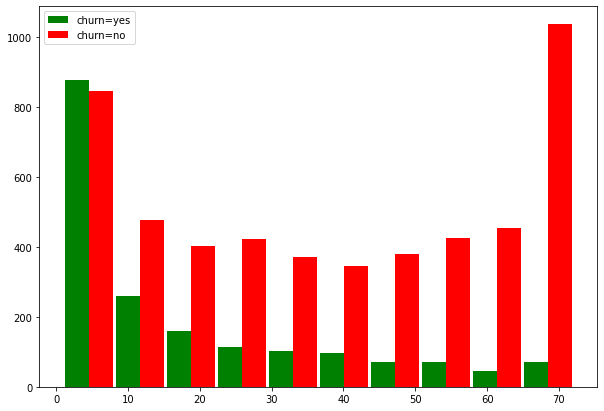

In [15]:
tenure_churn_no = df1[df1.Churn=='No'].tenure
tenure_churn_yes = df1[df1.Churn=='Yes'].tenure
plt.figure(figsize=(10,7)) 
plt.hist([tenure_churn_yes, tenure_churn_no],rwidth=0.95 , color=['green','red'] , label=['churn=yes','churn=no'])
plt.legend() 
   

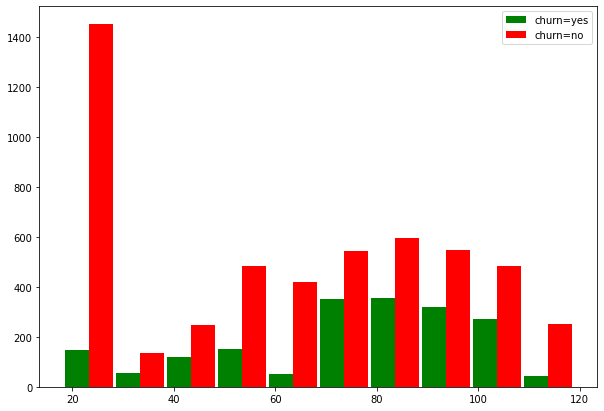

In [16]:
tenure_churn_no = df1[df1.Churn=='No'].MonthlyCharges
tenure_churn_yes = df1[df1.Churn=='Yes'].MonthlyCharges
plt.figure(figsize=(10,7))
plt.hist([tenure_churn_yes, tenure_churn_no],rwidth=0.95 , color=['green','red'] , label=['churn=yes','churn=no'])
plt.legend()


Many of the columns are yes, no etc. Let's print unique values in object columns to see data values

In [17]:
def unique_values_col (df):
    for column in df:
        if df[column].dtypes =='object':
            print(f'{column} : {df[column].unique()}')
    

In [18]:
unique_values_col(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


Some of the columns have no internet service or no phone service, that can be replaced with a simple No

In [19]:
df1.replace('No internet service' , 'No',inplace = True)
df1.replace('No phone service' , 'No',inplace = True)

C:\Users\M RAJESH\AppData\Local\Temp\ipykernel_2864\1389860495.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No internet service' , 'No',inplace = True)
C:\Users\M RAJESH\AppData\Local\Temp\ipykernel_2864\1389860495.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No phone service' , 'No',inplace = True)


In [20]:
unique_values_col(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [21]:
yes_no_col = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
              'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_col:
    df1[col].replace({'Yes':1 , 'No':0},inplace=True) 

C:\Users\M RAJESH\AppData\Local\Temp\ipykernel_2864\3245476302.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col].replace({'Yes':1 , 'No':0},inplace=True)


In [22]:
unique_values_col(df1)

gender : ['Female' 'Male']
InternetService : ['DSL' 'Fiber optic' 'No']
Contract : ['Month-to-month' 'One year' 'Two year']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [24]:
df1['gender'].replace({'Female':0 , 'Male':1},inplace=True)

C:\Users\M RAJESH\AppData\Local\Temp\ipykernel_2864\4002762901.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['gender'].replace({'Female':0 , 'Male':1},inplace=True)


In [25]:
df1['gender'].unique()

array([0, 1], dtype=int64)

One hot encoding for categorical columns

In [26]:
df2 = pd.get_dummies(data=df1 , columns=['InternetService','Contract','PaymentMethod'])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [27]:
df2.sample(6)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
6718,1,0,0,0,3,1,1,0,0,0,...,0,1,0,1,0,0,0,0,0,1
4881,1,0,1,0,28,1,0,0,0,0,...,0,1,0,1,0,0,1,0,0,0
5201,1,0,0,0,9,1,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
5881,0,0,0,0,34,1,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
792,0,0,1,1,8,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1
3410,1,0,0,0,3,1,0,0,0,0,...,1,0,0,1,0,0,0,1,0,0


In [28]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

{'whiskers': [<matplotlib.lines.Line2D at 0x16bdd552e80>,
 'caps': [<matplotlib.lines.Line2D at 0x16bdd504430>,
 'boxes': [<matplotlib.lines.Line2D at 0x16bde5bf2e0>],
 'medians': [<matplotlib.lines.Line2D at 0x16bdd504970>],
 'fliers': [<matplotlib.lines.Line2D at 0x16bdd504d00>],
 'means': []}

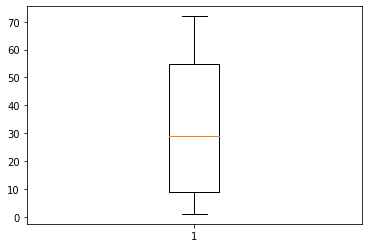

In [29]:
plt.boxplot(df2.tenure)

{'whiskers': [<matplotlib.lines.Line2D at 0x16bdef873a0>,
 'caps': [<matplotlib.lines.Line2D at 0x16bdef87940>,
 'boxes': [<matplotlib.lines.Line2D at 0x16bde5dda00>],
 'medians': [<matplotlib.lines.Line2D at 0x16bdef87ee0>],
 'fliers': [<matplotlib.lines.Line2D at 0x16bdef931f0>],
 'means': []}

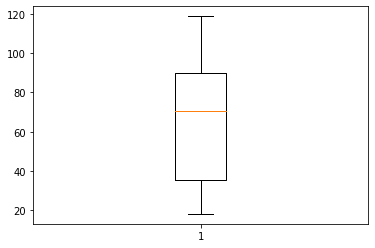

In [30]:
plt.boxplot(df2.MonthlyCharges)

{'whiskers': [<matplotlib.lines.Line2D at 0x16bdefdbf10>,
 'caps': [<matplotlib.lines.Line2D at 0x16bdefeb4f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x16bdefdbc40>],
 'medians': [<matplotlib.lines.Line2D at 0x16bdefeba90>],
 'fliers': [<matplotlib.lines.Line2D at 0x16bdefebd60>],
 'means': []}

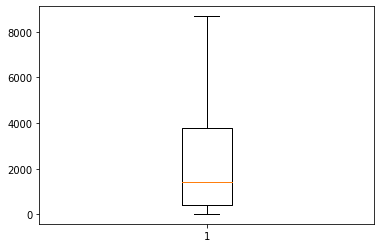

In [31]:
plt.boxplot(df2.TotalCharges)

In [32]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [33]:
df2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,0.000000,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,0.464789,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,0.014085,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,0.619718,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,0.014085,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [34]:
for i in df2:
    print(f'{i} : {df2[i].unique()}')

gender : [0 1]
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService : [0 1]
MultipleLines : [0 1]
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
Tech

Train test split

In [35]:
x= df2.drop('Churn',axis=1)
y=df2.Churn

In [38]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=5)

In [39]:
len(x_train)

5625

In [40]:
len(x_test)

1407

In [43]:
x_train.shape

(5625, 26)

Build a model (ANN) in tensorflow/keras

In [42]:
import tensorflow as tf
from tensorflow import keras


In [45]:
model = keras.Sequential([
    keras.layers.Dense(26,input_shape=(26,) , activation='relu'),
    keras.layers.Dense(15, activation ='relu'),
    keras.layers.Dense(1,activation = 'sigmoid') 
])
model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy']) 
model.fit(x_train,y_train,epochs=100) 

Epoch 1/100
176/176 [==============================] - 1s 1ms/step - loss: 0.4933 - accuracy: 0.7554
Epoch 2/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4241 - accuracy: 0.7970
Epoch 3/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4159 - accuracy: 0.8059
Epoch 4/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4134 - accuracy: 0.8030
Epoch 5/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4108 - accuracy: 0.8059
Epoch 6/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4086 - accuracy: 0.8107
Epoch 7/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4060 - accuracy: 0.8092
Epoch 8/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4055 - accuracy: 0.8098
Epoch 9/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4039 - accuracy: 0.8121
Epoch 10/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4026 - accura

In [46]:
model.evaluate(x_test,y_test)

44/44 [==============================] - 0s 1ms/step - loss: 0.5069 - accuracy: 0.7676


[0.5069112777709961, 0.7675906419754028]

In [47]:
yp = model.predict(x_test)

44/44 [==============================] - 0s 860us/step


In [48]:
yp[:5]

array([[3.0572298e-01],
       [4.0739724e-01],
       [8.6193485e-04],
       [9.0100926e-01],
       [7.3183185e-01]], dtype=float32)

In [49]:
y_pred = []
for i in yp:
    if i>=0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [50]:
y_pred[:10]

[0, 0, 0, 1, 1, 1, 0, 0, 0, 0]

In [52]:
y_test[:10]

2660    0
744     0
5579    1
64      1
3287    1
816     1
2670    0
5920    0
1023    0
6087    0
Name: Churn, dtype: int64

In [53]:
from sklearn.metrics import confusion_matrix , classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       999
           1       0.61      0.53      0.57       408

    accuracy                           0.77      1407
   macro avg       0.72      0.70      0.71      1407
weighted avg       0.76      0.77      0.76      1407



Text(69.0, 0.5, 'Truth')

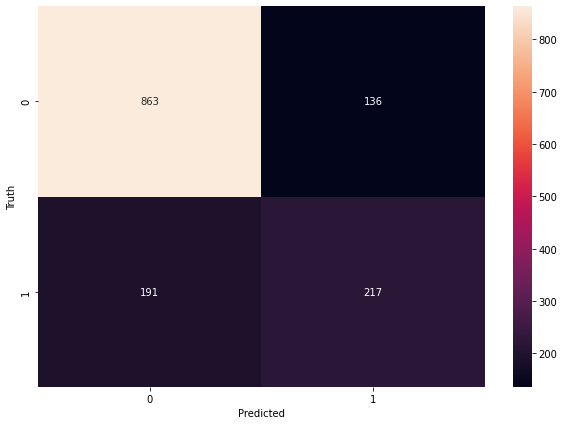

In [55]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [56]:
y_test.shape

(1407,)

Accuracy

In [57]:
round((862+229)/(862+229+137+179),2)

0.78

Precision for 0 class. i.e. Precision for customers who did not churn

In [58]:
round(862/(862+179),2)

0.83

Precision for 1 class. i.e. Precision for customers who actually churned

In [59]:
round(229/(229+137),2)

0.63

Recall for 0 class

In [60]:
round(862/(862+137),2)

0.86

In [61]:
round(229/(229+179),2)

0.56